
# 📊 Churn Customer Analysis







### 🎯 Exploratory Data Analysis (EDA) Objective

The objective of this EDA is to explore and understand the key patterns, trends, and relationships in the customer churn dataset. This includes:

- Identifying the overall churn rate
- Analyzing customer demographics and service usage
- Discovering which features are most associated with customer churn
- Spotting early signs or risk factors of churn
- Gaining actionable insights to guide feature selection for predictive modeling

The goal is to uncover meaningful patterns that can help improve customer retention strategies and support data-driven decision-making.


In [10]:
# Dataset info before cleaning

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Data Loading & Cleaning
In this section, we load the customer churn dataset and perform basic cleaning operations.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Customer Churn.csv')



In [8]:
# Replace blank strings in 'TotalCharges' with 0 and convert to float for accurate numerical conversion

df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for missing values and duplicates

print("Missing values per column:\n", df.isnull().sum())
print("Total missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())
print("Duplicate customer IDs:", df["customerID"].duplicated().sum())


Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Total missing values: 0
Duplicate rows: 0
Duplicate customer IDs: 0


In [6]:
# Convert 'SeniorCitizen' from 0/1 to 'Yes'/'No' for better interpretability

def convert(x):
    if x== 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)



## 2. Exploratory Data Analysis (EDA)
We explore the distribution of churn and analyze how various features relate to customer churn.

### I. Customer Churn Count (Bar Chart)
 This Python script visualizes the count of customer churn using a bar chart. The data is grouped by churn status ("Yes" or "No"), and the bars show the number of customers in each churn category. The bars are color-coded to differentiate between customers who have churned ("Yes") and those who have not ("No"). Seaborn is used to create the plot, and a custom color palette is applied for visual clarity.

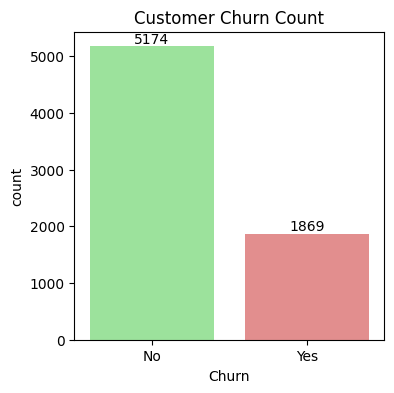

In [7]:
# Customer Churn count

plt.figure(figsize=(4,4))
plt.title("Customer Churn Count")
palette = {"Yes": "lightcoral", "No": "lightgreen"}
l = sns.countplot(x="Churn", data=df,hue="Churn",palette=palette,)
for container in l.containers:
    l.bar_label(container)
plt.show()


### II. Customer Churn Percentage (Pie Char)
This Python script visualizes the percentage of customer churn using a pie chart. The data is grouped by churn status ("Yes" or "No"), and the chart shows the proportion of customers in each churn category. The slices of the pie are color-coded to differentiate between customers who have churned ("Yes") and those who have not ("No"). Matplotlib is used to create the plot, and a custom color palette is applied for clarity.

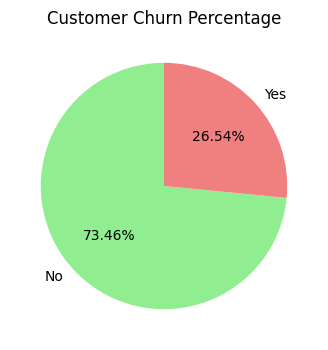

In [43]:
# Customer Churn percentage

plt.figure(figsize=(4, 4))
plt.title("Customer Churn Percentage")
churn_counts = df["Churn"].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.2f%%", startangle=90, colors=["lightgreen", "lightcoral"])
plt.show()


### III. Gender Distribution by Churn Status (Bar Chart)
This Python script visualizes the gender distribution among customers who have churned and those who have not, using a bar chart. The data is grouped by gender ("Male" or "Female") and churn status ("Yes" for churned, "No" for non-churned). The bars are color-coded to clearly differentiate between churned and non-churned customers. Seaborn is used for creating the plot, and a custom color palette is applied for clarity.

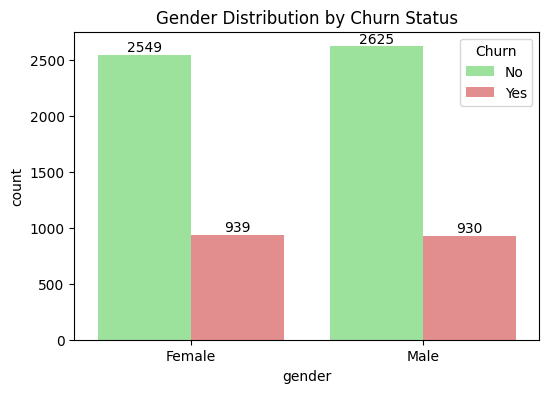

In [45]:
# Gender Distribution by Churn Status

plt.figure(figsize=(6,4))
plt.title("Gender Distribution by Churn Status")
palette = {"Yes": "lightcoral", "No": "lightgreen"}
l = sns.countplot(x="gender", data=df, hue="Churn", palette=palette)
for container in l.containers:
    l.bar_label(container)
plt.show()

### IV. Churn Count by Senior Citizen Status (Bar Chart)
This Python script visualizes the churn count based on Senior Citizen status (i.e., whether a customer is a senior citizen or not). The data is grouped by Senior Citizen status ("Senior" or "Not Senior") and churn status ("Yes" for churned, "No" for non-churned). The bars are color-coded to differentiate between churned and non-churned customers. Seaborn is used to create the plot, and a custom color palette is applied for visual clarity.

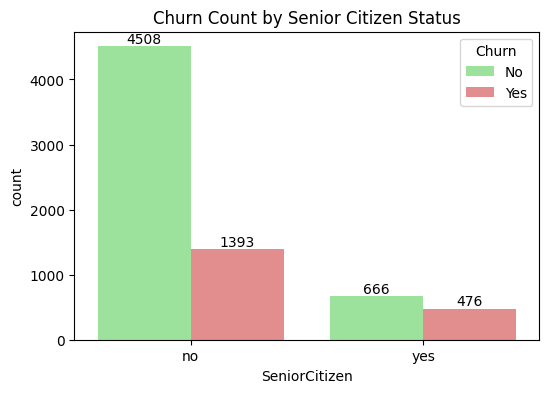

In [22]:
# Churn Count by Senior Citizen Status

plt.figure(figsize=(6,4))
plt.title("Churn Count by Senior Citizen Status")
palette={"Yes":"lightcoral","No":"lightgreen"}
l = sns.countplot(x="SeniorCitizen",data=df, hue="Churn",palette=palette)
for container in l.containers:
    l.bar_label(container)
plt.show()

### V. Churn Rate by Senior Citizen Status (Stacked Percentage Bar Chart)
This Python script creates a stacked bar chart that shows the percentage distribution of churned vs. non-churned customers within each Senior Citizen group (Senior vs. Not Senior). Each bar adds up to 100%, making it easy to compare the churn rate proportionally.

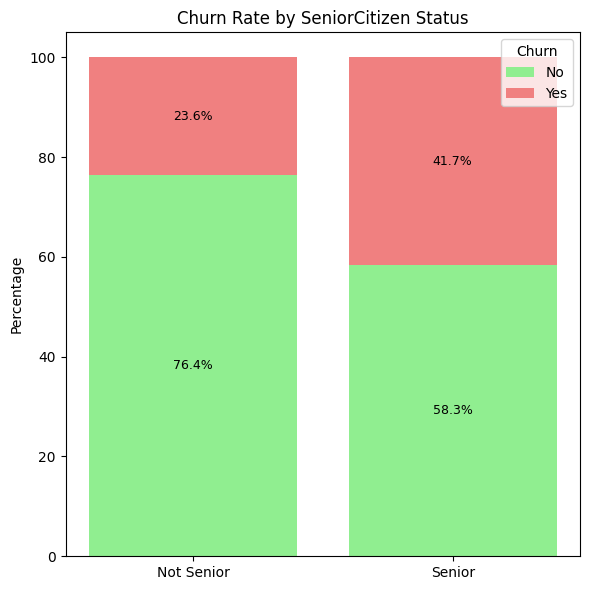

In [29]:
# Churn Rate by SeniorCitizen Status

# Assuming you have 'df' ready and have grouped and calculated percentages
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Define custom colors for "Yes" (Churn) and "No" (Not Churn)
palette = {"Yes": "lightcoral", "No": "lightgreen"}  # "Yes" for Churn, "No" for Not Churn

# Plot
plt.figure(figsize=(6, 6))
bottom = [0] * len(percentages)

# Loop through churn status columns and assign colors based on "Yes" or "No"
for churn_status in percentages.columns:
    label = churn_status  # Churn status is already "Yes" or "No" in the column
    plt.bar(percentages.index,
            percentages[churn_status],
            bottom=bottom,
            label=label,  # Use "Yes" or "No" as the label
            color=palette[label])  # Use color from the palette based on the label

    # Add percentage labels on bars
    for i, (val, b) in enumerate(zip(percentages[churn_status], bottom)):
        plt.text(i, b + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=9)

    bottom = [i + j for i, j in zip(bottom, percentages[churn_status])]

# Set labels and legend
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.ylabel("Percentage")
plt.title("Churn Rate by SeniorCitizen Status")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


### VI. Distribution of Tenure by Churn Status (Count - Histogram)
This Python script visualizes how customer tenure (i.e., number of months with the company) is distributed for churned vs. non-churned customers. It uses a histplot to show frequency counts, helping identify whether churn is more common at early or later stages of customer lifecycle.

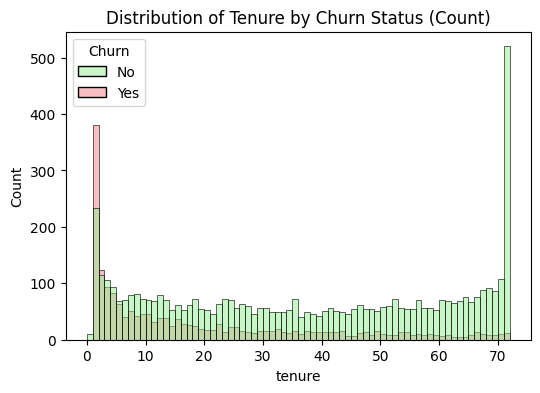

In [37]:
#Distribution of Tenure by Churn Status (Count)

plt.figure(figsize=(6,4))
plt.title("Distribution of Tenure by Churn Status (Count)")
palette={"Yes":"lightcoral","No":"lightgreen"}
sns.histplot(x="tenure",data=df,bins=72,hue="Churn",palette=palette)
plt.show()

### VII. Churn Count by Contract Type (Bar Chart)
This Python script visualizes the number of churned and non-churned customers for each contract type (e.g., Month-to-month, One year, Two year). It uses a Seaborn barplot with color-coded bars to distinguish between churned and non-churned customers. This allows you to see which contract types are most associated with customer churn.

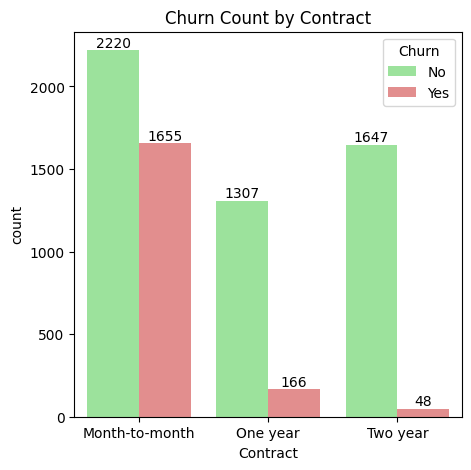

In [3]:
#Churn Count by Contract

plt.figure(figsize=(5,5))
plt.title("Churn Count by Contract")
palette={"Yes":"lightcoral","No":"lightgreen"}
ax=sns.countplot(x="Contract" , data=df, hue="Churn",palette=palette)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### VIII. Churn Count by Payment Method (Bar Chart)
This Python script shows the number of churned and non-churned customers for each payment method (e.g., Electronic Check, Mailed Check, Bank Transfer, Credit Card). It uses Seaborn for plotting, with distinct colors for churned vs. retained customers, making it easy to compare churn behavior across payment types.

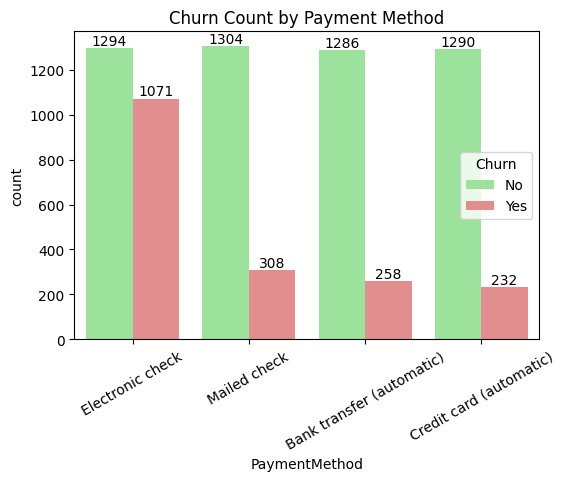

In [4]:
#Churn Count by Payment Method

plt.figure(figsize=(6,4))
plt.title("Churn Count by Payment Method")
palette={"Yes":"lightcoral","No":"lightgreen"}
l=sns.countplot(x="PaymentMethod", data=df, hue="Churn",palette=palette)
for container in l.containers:
    l.bar_label(container)
plt.xticks(rotation=30)
plt.show()

### IX. Service Features by Churn (Bar Charts)
This chart shows churned vs. non-churned customers across service features like Internet Service, Online Security, Tech Support, and Streaming. Customers with security/support features tend to churn less, while those using streaming services or fiber optic internet churn more. This highlights which services impact customer retention.

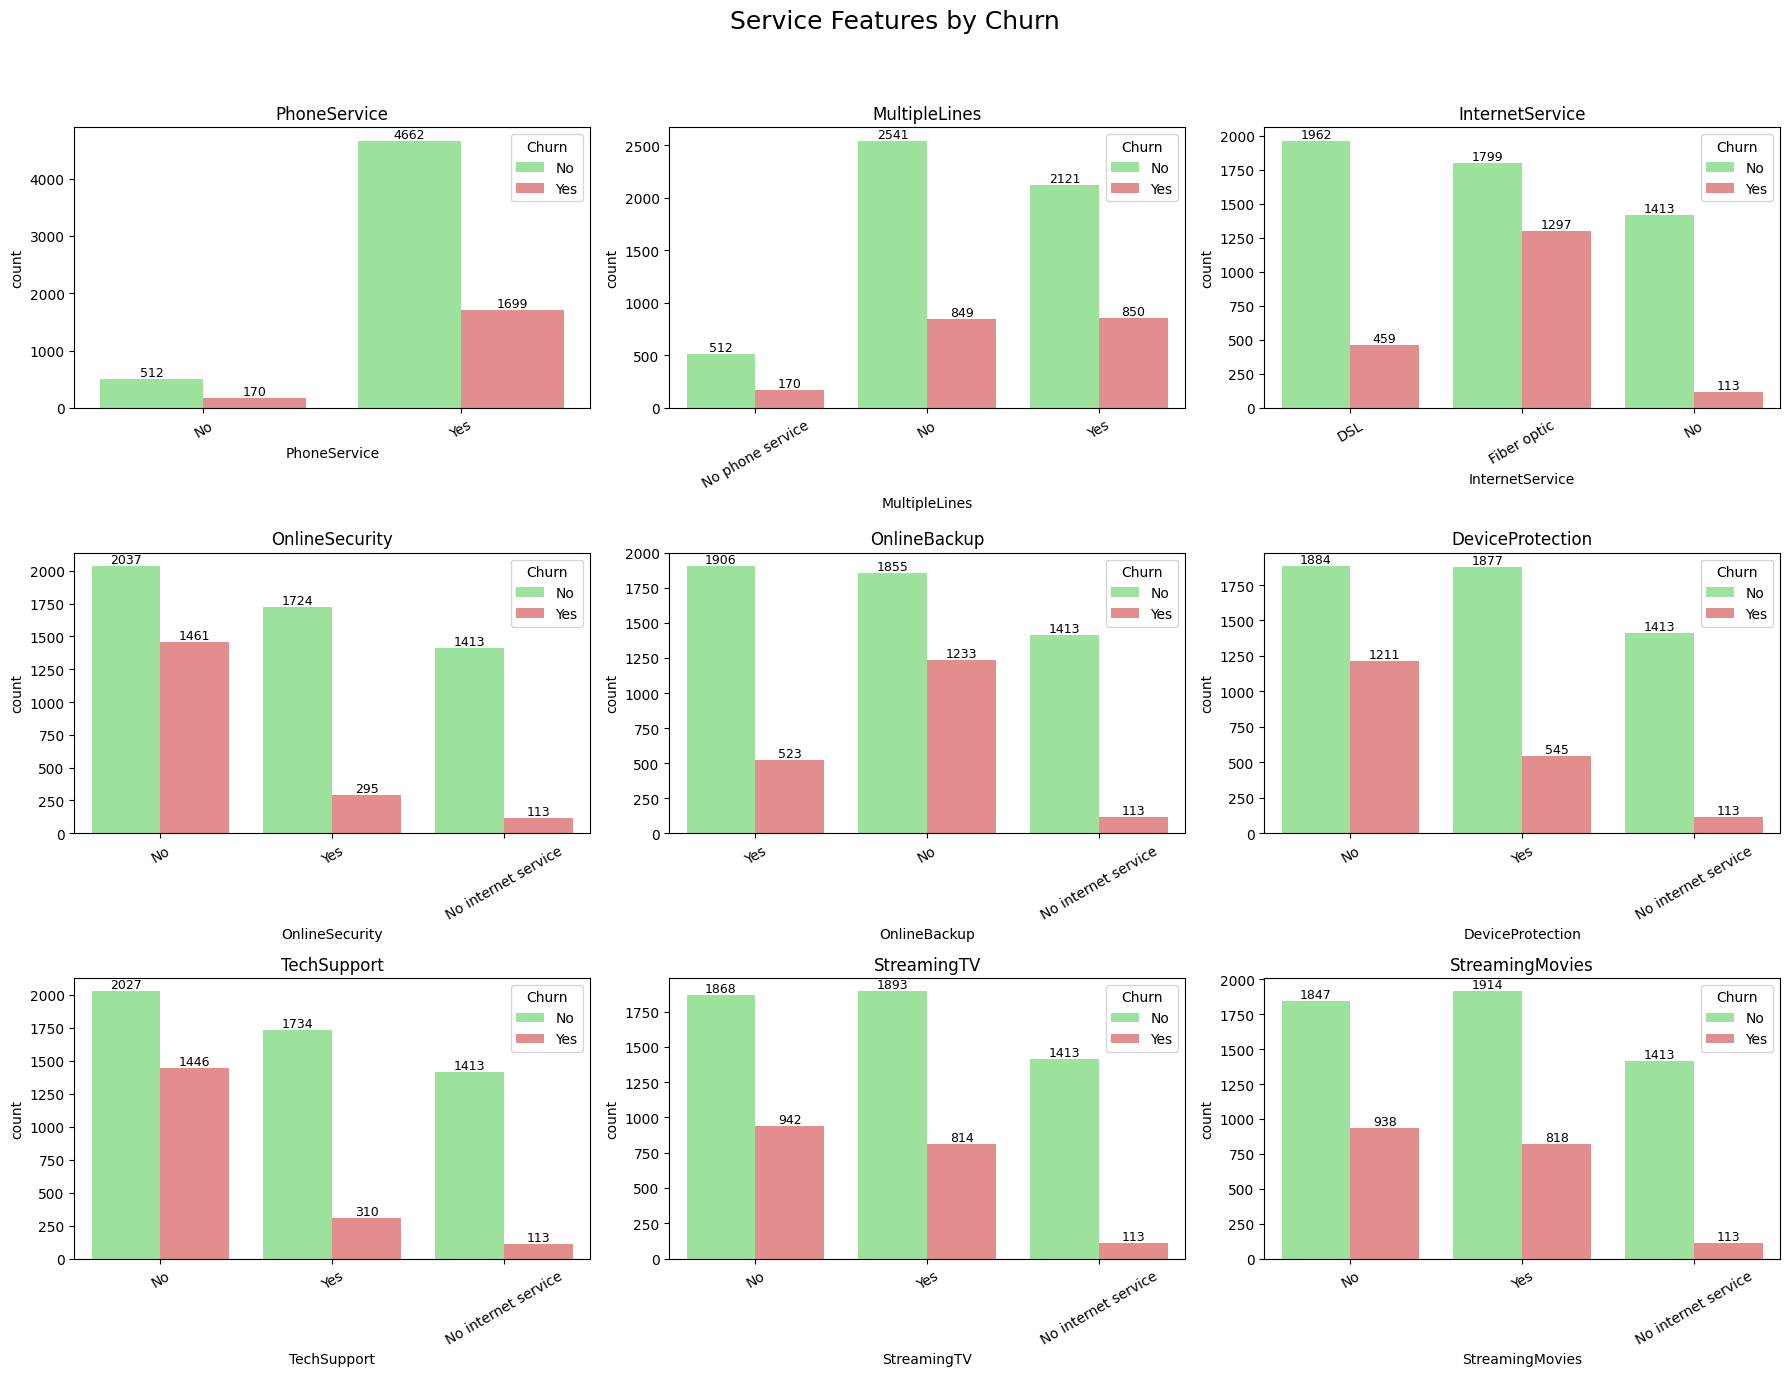

In [42]:
#Service Features by Churn

# List of service-related columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle("Service Features by Churn", fontsize=18)
axes = axes.flatten()

# Loop through each column and plot with hue='Churn'
for i, col in enumerate(cols):
    ax = sns.countplot(x=col, hue="Churn", data=df,palette={"Yes":"lightcoral","No":"lightgreen"}, ax=axes[i])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=30)
    
    # Add data labels for each bar
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 🔍 EDA Summary

- The overall churn rate is approximately **26.5%**.
- Customers with **month-to-month contracts** are more likely to churn.
- **Senior citizens** and **customers without dependents** have higher churn rates.
- Lack of **tech support** and **online security** is associated with increased churn.
- Customers using **electronic checks** tend to churn more than those with other payment methods.
- **Tenure** plays a major role — churn is highest in the first 12 months.

These insights will guide the feature selection and modeling process in the next stage
